In [35]:
import numpy as np
import pandas as pd

In [3]:
class Evaluation:
    def __init__(self, grandtruth_path, holoclean_path, initial_path):
        """
        This class implements all performance evaluation with output of the data
        :param grandtruth_path: list of data for the true data
        :param holoclean_path: the output of the holoclean
        :param initial_path: path to initial data
        """
        self.holo_path = holoclean_path
        self.gt_df = pd.read_csv(grandtruth_path)
        self.holo_df = pd.read_csv(holoclean_path)
        self.init_df = pd.read_csv(initial_path)

    def tuple_type(self):

        self.error_cells = self.init_df[~self.init_df.isin(self.gt_df).all(1)]
        self.correct_cells = self.init_df[self.init_df.isin(self.gt_df).all(1)]
        self.true_positive_alg = pd.merge(self.holo_df, self.gt_df, how='inner', on=['ind', 'attr', 'val'])
        
        self.false_positive = self.holo_df.shape[0] - self.true_positive_alg.shape[0]
        self.tmp1 = pd.merge(self.true_positive_alg, self.correct_cells, how='inner', on=['ind', 'attr', 'val'])
        self.false_negative = self.correct_cells.shape[0] - self.tmp1.shape[0]
        #self.tmp1 = pd.merge(self.true_positive_alg, self.correct_cells, how='inner', on=['ind', 'attr', 'val'])
        #self.false_negative = self.correct_cells.shape[0] - self.tmp1.shape[0]

        fixed_cells = self.init_df.shape[0]-self.holo_df.shape[0]
        
        #prec = float(self.true_positive_alg.shape[0] + fixed_cells) / (
                #fixed_cells + self.true_positive_alg.shape[0] +
                #self.false_positive)

        #recall = float(self.true_positive_alg.shape[0] + fixed_cells) / (
                #fixed_cells + self.true_positive_alg.shape[0] +
                #self.false_negative)
        
        prec = float(self.true_positive_alg.shape[0] ) / (
                 self.true_positive_alg.shape[0] +
                self.false_positive)

        recall = float(self.true_positive_alg.shape[0] ) / (
                 self.true_positive_alg.shape[0] +
                self.false_negative)
        
        print( "evaluating the output from: ", self.holo_path )
        print( "The precision is : " , str(prec))
        print( "The recall is : " , str(recall))
        print( "The F1 is : " , str(2 * float(prec * recall) / (prec + recall)))
        print( "-------------------------------------")


In [4]:


print("OUR HOSP 1K")
our_hosp_groundtruth='our-hosp/groundtruth/hosp-groundtruth.csv' 
ideal_deepdive_result='our-hosp/deepdive-result/deepdive-result-ideal-error-detection.csv'
our_hosp_dirty='our-hosp/dirty/hosp-dirty-input.csv'
eval3 = Evaluation(our_hosp_groundtruth, ideal_deepdive_result, our_hosp_dirty)
eval3.tuple_type()

custom_deepdive_result='our-hosp/deepdive-result/deepdive_result_custom_error_detection.csv'
eval4 = Evaluation(our_hosp_groundtruth, custom_deepdive_result, our_hosp_dirty)
eval4.tuple_type()


OUR HOSP 1K
evaluating the output from:  our-hosp/deepdive-result/deepdive-result-ideal-error-detection.csv
The precision is :  0.8431060798778937
The recall is :  0.9983432487386098
The F1 is :  0.9141812915905251
-------------------------------------
evaluating the output from:  our-hosp/deepdive-result/deepdive_result_custom_error_detection.csv
The precision is :  0.8966486190117195
The recall is :  0.9979405034324943
The F1 is :  0.9445868380202882
-------------------------------------


In [5]:
thresholds=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for t in thresholds:
    #print("our hosp t:", t)
    our_result_path = 'our-hosp/deepdive-result/deepdive_result_custom_err_detect_'+ str(t)+'_pruning.csv'
    eval_t = Evaluation(our_hosp_groundtruth, our_result_path, our_hosp_dirty) 
    #eval_t.tuple_type()
    

holoclean hosp: no pruning, no error detection

Precision: 0.4538, Recall: 0.3401, F-1: 0.3888

holoclean hosp: prunning done by perfect error detection

Precision: 0.8623, Recall: 1.0, F-1: 0.926

OUR HOSP - NO PRUNING:

our hosp: perfect error detection

Precision: 0.8431, Recall: 0.8294, F-1: 0.8362

our hosp: domain on error detection result: f1 50% 

Precision: 0.8966, Recall: 0.4361, F-1: 0.5868

OUR HOSP - WITH PRUNING (domain on error detection result: f1 50%)

our hosp: prunning threshold: 0.0 

Precision: 0.9164, Recall: 0.4154, F-1: 0.5716,

our hosp: prunning threshold: 0.1 

Precision: 0.9161, Recall: 0.4161, F-1: 0.5722,

our hosp: prunning threshold: 0.2 

Precision: 0.9174, Recall: 0.414, F-1: 0.5706,

our hosp: prunning threshold: 0.3 

Precision: 0.9231, Recall: 0.4067, F-1: 0.5646,

our hosp: prunning threshold: 0.4 

Precision: 0.9295, Recall: 0.4033, F-1: 0.5626,

our hosp: prunning threshold: 0.5 

Precision: 0.9297, Recall: 0.404, F-1: 0.5633,

our hosp: prunning threshold: 0.6 

Precision: 0.9367, Recall: 0.4147, F-1: 0.5749,

our hosp: prunning threshold: 0.7 

Precision: 0.9384, Recall: 0.4241, F-1: 0.5842,

our hosp: prunning threshold: 0.8 

Precision: 0.9383, Recall: 0.4241, F-1: 0.5841,

our hosp: prunning threshold: 0.9 

Precision: 0.9383, Recall: 0.4241, F-1: 0.5841,

our hosp: prunning threshold: 1.0 

Precision: 0.9383, Recall: 0.4241, F-1: 0.5841,


In [6]:
#todo: create series and plot
%matplotlib inline
import matplotlib.pyplot as plt

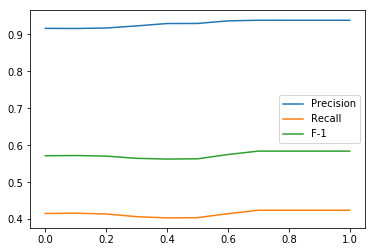

In [7]:
precision = pd.Series(index=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
          data=[0.9164, 0.9161, 0.9174, 0.9231, 0.9295, 0.9297, 0.9367, 0.9384, 0.9383, 0.9383, 0.9383])
precision.plot(label= "Precision")
recall = pd.Series(index=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
                  data=[0.4154, 0.4161,  0.414, 0.4067, 0.4033,  0.404, 0.4147, 0.4241,  0.4241, 0.4241, 0.4241])
recall.plot(label="Recall")
f1=pd.Series(index=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
            data=[0.5716, 0.5722, 0.5706, 0.5646, 0.5626, 0.5633, 0.5749, 0.5842, 0.5841, 0.5841, 0.5841])
f1.plot(label="F-1")
plt.legend()
plt.show()

In [43]:
#9fds
#evaluating: /Users/visenger/deepdive_notebooks/error_detection/result/error_detection_17_9fd.csv
#tp: 1139, fp: 6471, total errors: 1320
#Precision: 0.1497, Recall: 0.8629, F-1: 0.2551
#----------------------------------------

print()
precision_err_detect = pd.Series(index=["aggregating errors with stacking (baseline)", 
                                        "error detection by distant supervision with one FD ZIP=>STATE", 
                                        "error detection by distant supervision with 2 FDs ZIP=>STATE, ZIP=>CITY", 
                                  "error detection by distant supervision with 3 FDs ",
                                 "error detection by distant supervision with 5 FDs ",
                                 "error detection by distant supervision with 5 FDs + ext dict",
                                "error detection by distant supervision with 7 FDs + ext dict",
                                "error detection by distant supervision with 9 FDs + ext dict"], 
                           data=[0.7762, 0.1236,0.1309, 0.1329,0.1333, 0.1392, 0.1433, 0.1497])
recall_err_detect = pd.Series(index=["aggregating errors with stacking (baseline)", 
                                     "error detection by distant supervision with one FD ZIP=>STATE", 
                                     "error detection by distant supervision with 2 FDs ZIP=>STATE, ZIP=>CITY", 
                               "error detection by distant supervision with 3 FDs ",
                              "error detection by distant supervision with 5 FDs ",
                            "error detection by distant supervision with 5 FDs + ext dict",
                            "error detection by distant supervision with 7 FDs + ext dict",
                            "error detection by distant supervision with 9 FDs + ext dict"], 
                        data=[0.3705, 0.8977, 0.8977, 0.8939, 0.8939, 0.8121, 0.8629, 0.8629])

f1_err_detect = pd.Series(index=["aggregating errors with stacking (baseline)", 
                                 "error detection by distant supervision with one FD ZIP=>STATE", 
                                 "error detection by distant supervision with 2 FDs ZIP=>STATE, ZIP=>CITY", 
                            "error detection by distant supervision with 3 FDs ",
                           "error detection by distant supervision with 5 FDs ",
                            "error detection by distant supervision with 5 FDs + ext dict",
                        "error detection by distant supervision with 7 FDs + ext dict",
                        "error detection by distant supervision with 9 FDs + ext dict"], 
                        data=[0.5015, 0.2172, 0.2285, 0.2314, 0.2321, 0.2377, 0.2458, 0.2551])

error_detection_eval_dict={
    "Precision": precision_err_detect,
    "Recall": recall_err_detect,
    "F-1": f1_err_detect
}

evalErrorDetection = pd.DataFrame(error_detection_eval_dict, columns=["Precision", "Recall", "F-1"])
#print("ERROR DETECTION METHODS:")
#evalErrorDetection


In [46]:
#REPAIR:
#error detection is done by distant supervision with 9 FDs and external dictionary:
#Precision: 0.4456, Recall: 0.9732, F-1: 0.6113

precision_err_repair = pd.Series(index=["perfect error detection (using groundtruth)", 
                                  "our error detect F1 50% (baseline - errors aggregation with stacking)", 
                                  "error detection by distant supervision with one FD ZIP=>STATE", 
                                  "error detection by distant supervision with 2 FDs ZIP=>STATE, ZIP=>CITY",
                                 "error detection by distant supervision with 3 FDs",
                                 "error detection by distant supervision with 5 FDs",
                                 "error detection by distant supervision with 5 FDs + ext dict",
                                 "error detection by distant supervision with 7 FDs + ext dict",
                                       "error detection by distant supervision with 9 FDs + ext dict"], 
                           data=[0.8431, 0.8966,0.343, 0.364, 0.3785,0.3797, 0.4222, 0.4137, 0.4456])


recall_err_repair = pd.Series(index=["perfect error detection (using groundtruth)", 
                               "our error detect F1 50% (baseline - errors aggregation with stacking)", 
                               "error detection by distant supervision with one FD ZIP=>STATE", 
                               "error detection by distant supervision with 2 FDs ZIP=>STATE, ZIP=>CITY",
                              "error detection by distant supervision with 3 FDs",
                              "error detection by distant supervision with 5 FDs",
                                 "error detection by distant supervision with 5 FDs + ext dict",
                              "error detection by distant supervision with 7 FDs + ext dict",
                                    "error detection by distant supervision with 9 FDs + ext dict"], 
                        data=[0.8294,0.4361, 0.9043, 0.986, 0.9819, 0.9819, 0.9739, 0.9739, 0.9732])

f1_err_repair = pd.Series(index=["perfect error detection (using groundtruth)", 
                            "our error detect F1 50% (baseline - errors aggregation with stacking)", 
                            "error detection by distant supervision with one FD ZIP=>STATE", 
                            "error detection by distant supervision with 2 FDs ZIP=>STATE, ZIP=>CITY",
                           "error detection by distant supervision with 3 FDs",
                           "error detection by distant supervision with 5 FDs",
                                 "error detection by distant supervision with 5 FDs + ext dict",
                          "error detection by distant supervision with 7 FDs + ext dict",
                            "error detection by distant supervision with 9 FDs + ext dict"], 
                     data=[0.8362,0.5868, 0.4973, 0.5317, 0.5464, 0.5476, 0.589, 0.5807, 0.6113])

no_pruning_eval_dict ={
    "Precision": precision_err_repair,
    "Recall": recall_err_repair,
    "F-1": f1_err_repair
}

evalNoPruningDF=pd.DataFrame(no_pruning_eval_dict, columns=["Precision", "Recall", "F-1"])
#print("OUR ERROR DETECTION METHOD + HOLOCLEAN APPOACH FOR ERROR REPAIR:")    
#evalNoPruningDF

In [47]:
print("ERROR DETECTION METHODS:")
evalErrorDetection

ERROR DETECTION METHODS:


,Precision,Recall,F-1
aggregating errors with stacking (baseline),0.7762,0.3705,0.5015
error detection by distant supervision with one FD ZIP=>STATE,0.1236,0.8977,0.2172
"error detection by distant supervision with 2 FDs ZIP=>STATE, ZIP=>CITY",0.1309,0.8977,0.2285
error detection by distant supervision with 3 FDs,0.1329,0.8939,0.2314
error detection by distant supervision with 5 FDs,0.1333,0.8939,0.2321
error detection by distant supervision with 5 FDs + ext dict,0.1392,0.8121,0.2377
error detection by distant supervision with 7 FDs + ext dict,0.1433,0.8629,0.2458
error detection by distant supervision with 9 FDs + ext dict,0.1497,0.8629,0.2551


In [48]:
print("OUR ERROR DETECTION METHOD + HOLOCLEAN APPOACH FOR ERROR REPAIR:")    
evalNoPruningDF

OUR ERROR DETECTION METHOD + HOLOCLEAN APPOACH FOR ERROR REPAIR:


,Precision,Recall,F-1
perfect error detection (using groundtruth),0.8431,0.8294,0.8362
our error detect F1 50% (baseline - errors aggregation with stacking),0.8966,0.4361,0.5868
error detection by distant supervision with one FD ZIP=>STATE,0.3430,0.9043,0.4973
"error detection by distant supervision with 2 FDs ZIP=>STATE, ZIP=>CITY",0.3640,0.9860,0.5317
error detection by distant supervision with 3 FDs,0.3785,0.9819,0.5464
error detection by distant supervision with 5 FDs,0.3797,0.9819,0.5476
error detection by distant supervision with 5 FDs + ext dict,0.4222,0.9739,0.5890
error detection by distant supervision with 7 FDs + ext dict,0.4137,0.9739,0.5807
error detection by distant supervision with 9 FDs + ext dict,0.4456,0.9732,0.6113


In [11]:
print("Pruning based: Our error detection + holoclean approach:")
eval_dict = {
    "Precision": precision,
    "Recall": recall,
    "F-1": f1
}
evalDF=pd.DataFrame(eval_dict,columns=["Precision", "Recall", "F-1"])
evalDF

Pruning based: Our error detection + holoclean approach:


,Precision,Recall,F-1
0.0,0.9164,0.4154,0.5716
0.1,0.9161,0.4161,0.5722
0.2,0.9174,0.4140,0.5706
0.3,0.9231,0.4067,0.5646
0.4,0.9295,0.4033,0.5626
0.5,0.9297,0.4040,0.5633
0.6,0.9367,0.4147,0.5749
0.7,0.9384,0.4241,0.5842
0.8,0.9383,0.4241,0.5841
0.9,0.9383,0.4241,0.5841
